<a href="https://colab.research.google.com/github/Ger678/React-Tic-Tac/blob/master/Trabajo_Practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Base de Datos Económicos Agregados (Series de Tiempo)**
Base de series de tiempo de fuentes primarias y secundarias de la Administración Pública Nacional, compilada por Jefatura de Gabinete de Ministros, normalizadas por organismos de la APN de acuerdo a los estándares propuestos por Jefatura.

**Valores y metadatos**
Valores y metadatos básicos de las series. Contiene todos los pares (fecha, valor) de la base, enriquecidos con metadatos básicos.

Fuente: https://www.economia.gob.ar/datos/

**Variables Presentes**

1.   catalogo_id: Identificador del catálogo del dataset.
2.   dataset_id: Identificador único del conjunto de datos.
3. distribucion_id: Identificador único de la distribución dentro del dataset.
5.serie_id: Identificador de la serie específica.
6.indice_tiempo: Fecha o punto en el tiempo de la observación.
7.indice_tiempo_frecuencia: Frecuencia de la medición (diaria, mensual, anual, etc.).
8.valor: Valor cuantitativo registrado.
9.serie_titulo: Título descriptivo de la serie.
10.serie_unidades: Unidades en las que se expresa el valor (por ejemplo, toneladas, grados, etc.).
11.serie_descripcion: Descripción detallada de la serie.
12.distribucion_descripcion: Detalles sobre la distribución.
13.dataset_tema: Tema general del dataset (economía, clima, etc.).
14.dataset_responsable: Persona o entidad responsable del dataset.
15.dataset_fuente: Fuente de donde se extrajeron los datos.
15.dataset_titulo: Título descriptivo del conjunto de datos.

**Variables Relevantes:**

1. indice_tiempo e indice_tiempo_frecuencia: Esenciales para entender la dimensión temporal del análisis.
2. valor: Variable clave que representa el dato medido.
3. serie_titulo y dataset_tema: Proveen contexto para categorizar y analizar los datos por sectores o áreas específicas.

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autenticación
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# ID de la carpeta compartida
folder_id = "1zGhitiYhRVI8BalkmY-YfI3PU4RAQFwd"

download = drive.CreateFile({'id': '1YwqOZks4IanZmPn4zVjeYweH9FSCrcoY'})
download.GetContentFile('series-tiempo.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mode

In [ ]:
df = pd.read_csv('series-tiempo.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315257 entries, 0 to 3315256
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   catalogo_id               object 
 1   dataset_id                int64  
 2   distribucion_id           float64
 3   serie_id                  object 
 4   indice_tiempo             object 
 5   indice_tiempo_frecuencia  object 
 6   valor                     float64
 7   serie_titulo              object 
 8   serie_unidades            object 
 9   serie_descripcion         object 
 10  distribucion_descripcion  object 
 11  dataset_tema              object 
 12  dataset_responsable       object 
 13  dataset_fuente            object 
 14  dataset_titulo            object 
dtypes: float64(2), int64(1), object(12)
memory usage: 379.4+ MB


In [ ]:
print(f' Filas y Columnas del archivo Original{df.shape}')

 Filas y Columnas del archivo Original(3315257, 15)


In [ ]:
print(df.describe())


         dataset_id  distribucion_id         valor
count  3.315257e+06     3.315257e+06  3.219312e+06
mean   2.245183e+02     2.247326e+02  5.812410e+06
std    1.207842e+02     1.207874e+02  7.978428e+08
min    1.000000e+00     1.100000e+00 -5.159518e+09
25%    1.220000e+02     1.222000e+02  4.427193e+00
50%    1.750000e+02     1.751000e+02  1.185165e+02
75%    3.580000e+02     3.581000e+02  7.510000e+02
max    4.640000e+02     4.642000e+02  4.820231e+11


In [ ]:
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])

**Análisis del Impacto Económico de la Pandemia en Argentina**

Introducción

La pandemia de COVID-19 tuvo un impacto significativo en la economía global, y Argentina no fue la excepción. Durante el período 2019-2021, el país experimentó una caída abrupta en la actividad económica debido a las medidas de confinamiento, restricciones a la movilidad y la disminución del consumo e inversión. En particular, el mercado laboral se vio severamente afectado, con pérdidas masivas de empleo en algunos sectores, mientras que otros lograron mantener cierta estabilidad o incluso crecer.

Este análisis se centra en la evolución del empleo en Argentina entre 2017 y 2024, observando las tendencias en distintos sectores económicos y los efectos persistentes de la crisis sanitaria en el mercado laboral. A través de distintas visualizaciones, se examinarán los cambios en la cantidad de empleados, los salarios en pesos corrientes y la distribución del empleo por sectores.



**Gráfico 1: Visualización de Empleos en Miles de Personas (2017-2024)**

Descripción:

Esta tabla muestra los 10 principales sectores en términos de empleo, medido en miles de personas, entre los años 2017 y 2024. Nos permite observar cómo ha evolucionado la cantidad de trabajadores en cada sector, identificando tendencias de crecimiento o declive.

Análisis:

* Algunos sectores, como la salud y la tecnología, mostraron un
crecimiento en el empleo debido a la mayor demanda de sus servicios durante y después de la pandemia.

* Sectores tradicionales como la industria manufacturera y el comercio experimentaron fluctuaciones significativas, con caídas pronunciadas en 2020 y una recuperación progresiva posterior.

* El empleo en el sector turístico se vio gravemente afectado en 2020, pero a partir de 2022 mostró signos de recuperación.




In [ ]:
empleos2024_MilesPersonas = (
    df[(df['serie_unidades'] == "Miles de Personas") &
       (df['dataset_fuente'] == "Ministerio de Capital Humano") &
       (df['indice_tiempo'].dt.year >= 2017) &
       (df['indice_tiempo'].dt.year <= 2024)]
    .groupby(['serie_descripcion', 'serie_unidades', 'serie_titulo'])
    .agg({'valor': 'sum'})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
    .nlargest(10, 'Total Valor')
)

print("Los 10 principales sectores en términos de empleo (Miles de Personas) entre 2017 y 2024 son:")
print(empleos2024_MilesPersonas)

Los 10 principales sectores en términos de empleo (Miles de Personas) entre 2017 y 2024 son:
                                    serie_descripcion     serie_unidades  \
45         Total de trabajadores. Sin estacionalidad.  Miles de Personas   
44         Total de trabajadores. Con estacionalidad.  Miles de Personas   
28   Asalariados. Sector privado. Sin estacionalidad.  Miles de Personas   
32  Asalariados. Sector privado. Total. Sin estaci...  Miles de Personas   
8    Asalariados. Sector privado. Con estacionalidad.  Miles de Personas   
31  Asalariados. Sector privado. Total. Con estaci...  Miles de Personas   
37   Asalariados. Sector público. Sin estacionalidad.  Miles de Personas   
36   Asalariados. Sector público. Con estacionalidad.  Miles de Personas   
41  Independientes con monotributo. Sin estacional...  Miles de Personas   
43    Independientes monotributo. Con estacionalidad.  Miles de Personas   

                                 serie_titulo  Total Valor  
45       

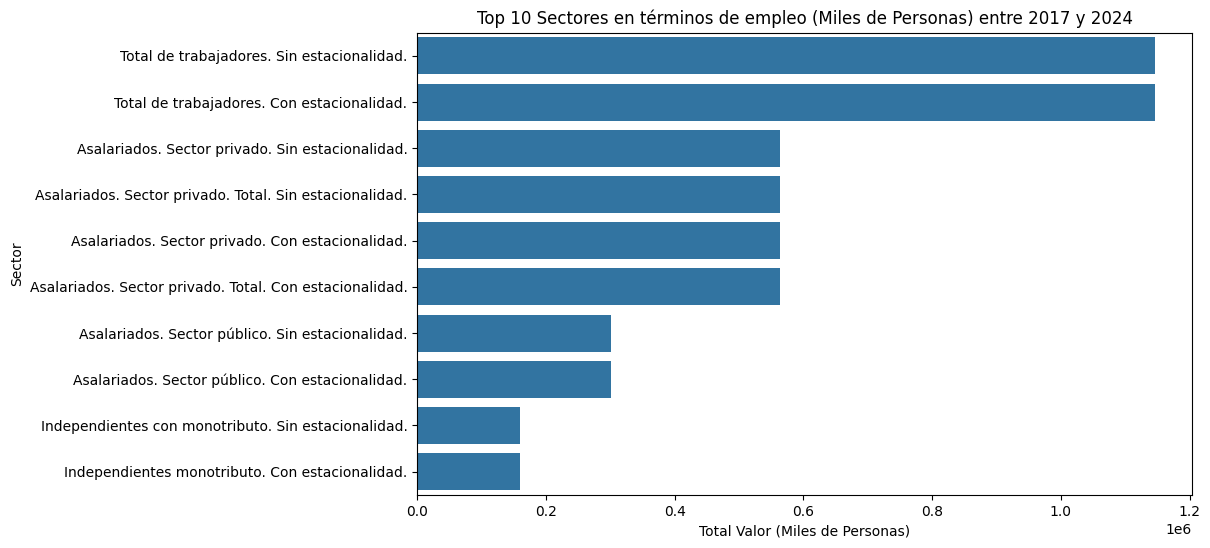

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=empleos2024_MilesPersonas, x='Total Valor', y='serie_descripcion')
plt.title('Top 10 Sectores en términos de empleo (Miles de Personas) entre 2017 y 2024')
plt.xlabel('Total Valor (Miles de Personas)')
plt.ylabel('Sector')
plt.show()

**Gráfico 2: Visualización de Empleos en Pesos Corrientes (2024)**

Descripción:

Esta tabla muestra los 10 principales sectores en términos de empleo, medidos en pesos corrientes, durante el año 2024.

Análisis:

* Se observa una disparidad significativa entre los salarios de distintos sectores. Mientras que algunos sectores, como el minero, ofrecen salarios relativamente altos, otros, como el de empleados estatales.

In [ ]:
empleos2024_Pesos = (
    df[(df['serie_unidades'] == "Pesos corrientes") &
       (df['dataset_fuente'] == "Ministerio de Capital Humano") &
       (df['indice_tiempo'].dt.year == 2024)]
    .groupby(['serie_descripcion', 'serie_unidades', 'serie_titulo'])
    .agg({'valor': 'sum'})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
    .nlargest(10, 'Total Valor')
)

print("Los 10 principales sectores en términos de empleo (Pesos corrientes) en 2024 son:")
print(empleos2024_Pesos)

Los 10 principales sectores en términos de empleo (Pesos corrientes) en 2024 son:
                                    serie_descripcion    serie_unidades  \
20  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
5   Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
9   Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
23  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
18  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
24  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
8   Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
3   Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
29  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
30  Remuneración imponible promedio de los trabaja...  Pesos corrientes   

                                         serie_titulo   Total Valor  
20          rem_bruta_

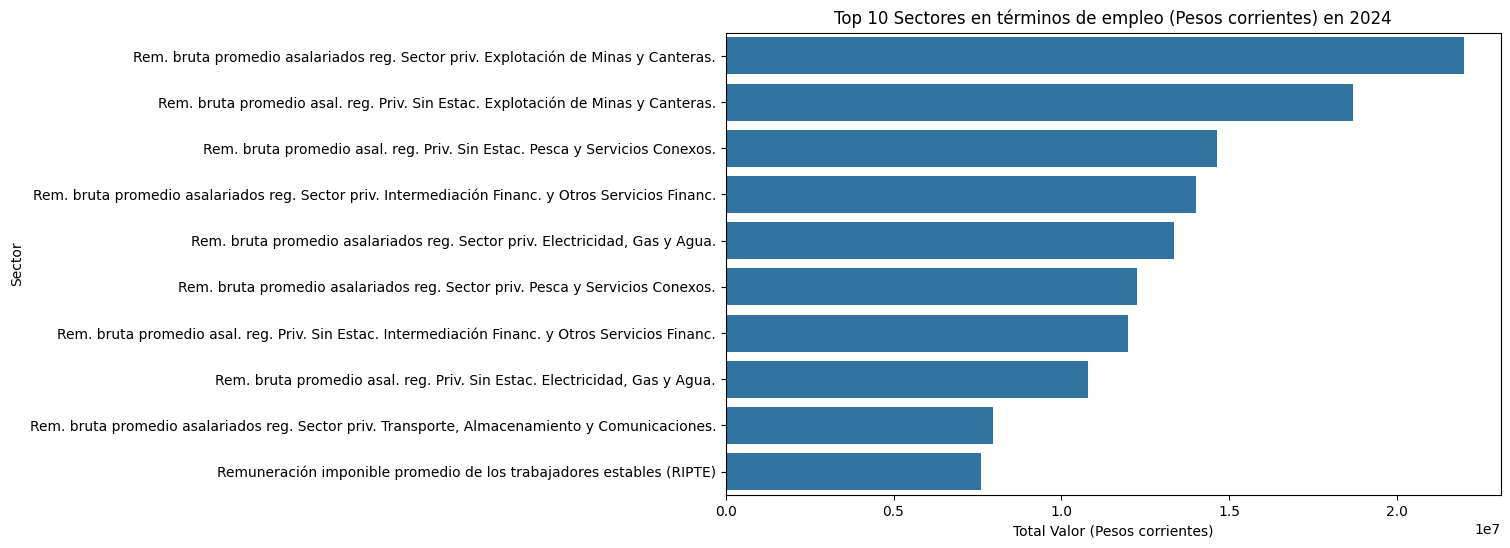

In [ ]:
empleos2024_Pesos = (
    df[(df['serie_unidades'] == "Pesos corrientes") &
       (df['dataset_fuente'] == "Ministerio de Capital Humano") &
       (df['Year'] == 2024)]
    .groupby(['serie_descripcion', 'serie_unidades', 'serie_titulo'])
    .agg({'valor': 'sum'})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
    .nlargest(10, 'Total Valor')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=empleos2024_Pesos, x='Total Valor', y='serie_descripcion')
plt.title('Top 10 Sectores en términos de empleo (Pesos corrientes) en 2024')
plt.xlabel('Total Valor (Pesos corrientes)')
plt.ylabel('Sector')
plt.show()

**Gráfico 3: Visualización de Puestos de Trabajo (2017-2024)**

Descripción:

Esta tabla muestra los 10 principales sectores en términos de cantidad de puestos de trabajo entre 2017 y 2024.




In [ ]:
empleos2024_PuestosTrabajo = (
    df[(df['serie_unidades'] == "Puestos de trabajo") &
       (df['dataset_fuente'] == "Ministerio de Capital Humano") &
       (df['indice_tiempo'].dt.year >= 2017) &
       (df['indice_tiempo'].dt.year <= 2024)]
    .groupby(['serie_descripcion', 'serie_unidades', 'serie_titulo'])
    .agg({'valor': 'sum'})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
    .nlargest(10, 'Total Valor')
)

print("Los 10 principales sectores en términos de puestos de trabajo entre 2017 y 2024 son:")
print(empleos2024_PuestosTrabajo)

Los 10 principales sectores en términos de puestos de trabajo entre 2017 y 2024 son:
                                    serie_descripcion      serie_unidades  \
15          Empleo registrado. Sector Privado. Total.  Puestos de trabajo   
14  Empleo registrado. Sector Privado. Sin Estacio...  Puestos de trabajo   
6       Empleo registrado. Sector Privado. Servicios.  Puestos de trabajo   
13  Empleo registrado. Sector Privado. Sin Estacio...  Puestos de trabajo   
4       Empleo registrado. Sector Privado. Industria.  Puestos de trabajo   
11  Empleo registrado. Sector Privado. Sin Estacio...  Puestos de trabajo   
1        Empleo registrado. Sector Privado. Comercio.  Puestos de trabajo   
8   Empleo registrado. Sector Privado. Sin Estacio...  Puestos de trabajo   
9   Empleo registrado. Sector Privado. Sin Estacio...  Puestos de trabajo   
2    Empleo registrado. Sector Privado. Construcción.  Puestos de trabajo   

                                     serie_titulo  Total Valor  
15

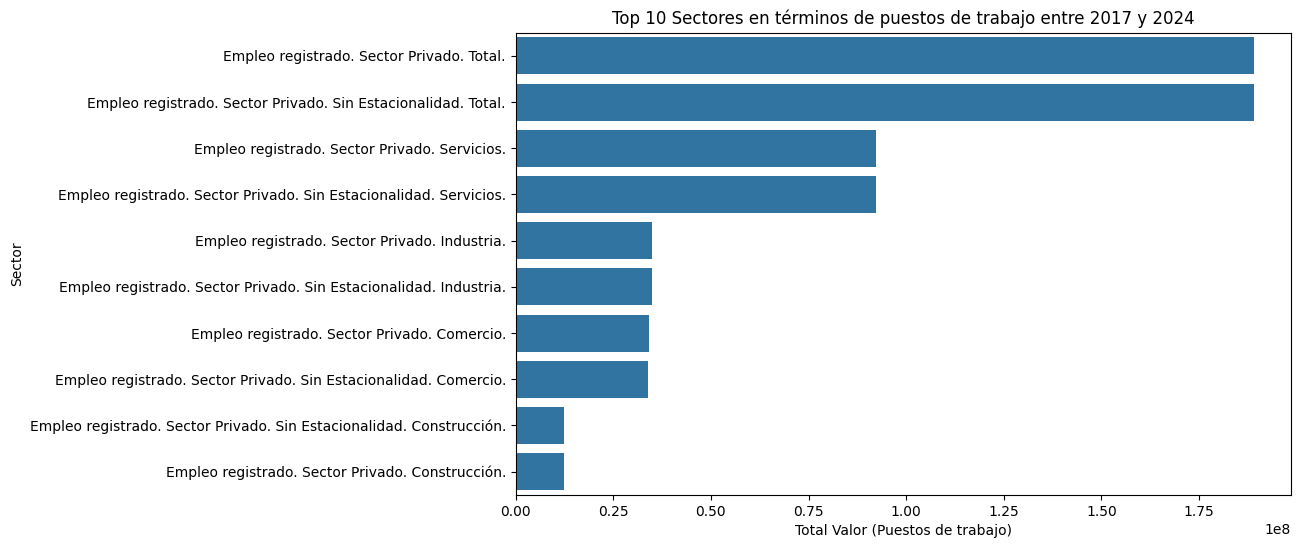

In [ ]:
empleos2024_PuestosTrabajo = (
    df[(df['serie_unidades'] == "Puestos de trabajo") &
       (df['dataset_fuente'] == "Ministerio de Capital Humano") &
       (df['Year'] >= 2017) &
       (df['Year'] <= 2024)]
    .groupby(['serie_descripcion', 'serie_unidades', 'serie_titulo'])
    .agg({'valor': 'sum'})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
    .nlargest(10, 'Total Valor')
)

plt.figure(figsize=(10, 6))
sns.barplot(data=empleos2024_PuestosTrabajo, x='Total Valor', y='serie_descripcion')
plt.title('Top 10 Sectores en términos de puestos de trabajo entre 2017 y 2024')
plt.xlabel('Total Valor (Puestos de trabajo)')
plt.ylabel('Sector')
plt.show()

Gráfico 4: Visualización de Empleos por Sector (2017-2024)

Descripción:

Esta tabla muestra los empleos por sector entre 2017 y 2024, incluyendo el total de valores y las fechas de inicio y fin del análisis.

Análisis:

* Nos permite observar la variabilidad en los distintos sectores a lo largo del tiempo.

* Determina qué sectores han logrado una recuperación estable y cuáles continúan en crisis.

* Ayuda a prever posibles tendencias futuras del mercado laboral en Argentina.


In [ ]:
empleosPorSector = (
    df[(df['dataset_fuente'] == "Ministerio de Trabajo, Empleo y Seguridad Social") &
       (df['serie_titulo'] != "Total") &
       (df['indice_tiempo'].dt.year >= 2017) &
       (df['indice_tiempo'].dt.year <= 2024)]
    .groupby(['serie_titulo', 'serie_descripcion'])
    .agg({'valor': 'sum', 'indice_tiempo': ['min', 'max']})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
)

print("Empleos por sector entre 2017 y 2024:")
print(empleosPorSector)

Empleos por sector entre 2017 y 2024:
                                      serie_titulo  \
                                                     
0          agricultura_ganaderia_caza_silvicultura   
1                     comercio_por_mayor_por_menor   
2                                     construccion   
3                            electricidad_gas_agua   
4                                       ensenianza   
5                       explotacion_minas_canteras   
6                           hoteleria_restaurantes   
7                          industria_manufacturera   
8        intermediacion_financiera_otros_ser_finan   
9                          pesca_servicios_conexos   
10      servicios_comunitarios_sociales_personales   
11  servicios_inmobiliarios_empresariales_alquiler   
12                        servicios_sociales_salud   
13                                           total   
14        transporte_almacenamiento_comunicaciones   

                                    serie_d

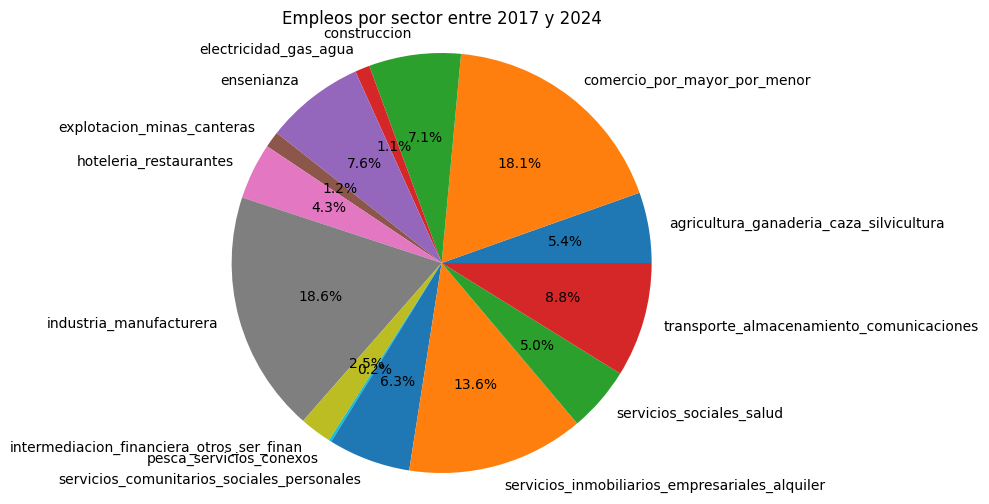

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

empleosPorSector = (
    df[(df['dataset_fuente'] == "Ministerio de Trabajo, Empleo y Seguridad Social") &
       (df['serie_titulo'] != "total") &
       (df['Year'] >= 2017) &
       (df['Year'] <= 2024)]
    .groupby(['serie_titulo', 'serie_descripcion'])
    .agg({'valor': 'sum', 'indice_tiempo': ['min', 'max']})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
)

empleosPorSector.columns = ['serie_titulo', 'serie_descripcion', 'Total Valor', 'Primer Fecha', 'Última Fecha']

plt.figure(figsize=(10, 6))
plt.pie(empleosPorSector['Total Valor'], labels=empleosPorSector['serie_titulo'], autopct='%1.1f%%')
plt.title('Empleos por sector entre 2017 y 2024')
plt.axis('equal')
plt.show()

**Gráfico 6: Visualización de Valores por Año en el Sector Manufacturero (2017-2024)**

Descripción:

Esta tabla muestra los valores por año en el sector manufacturero entre 2017 y 2024.

Análisis:

* La industria manufacturera ha tenido un papel clave en la economía argentina, representando un porcentaje significativo del empleo total.

* Se observan fluctuaciones en los valores de producción a lo largo del tiempo, con impactos notables durante la pandemia.

* La recuperación del sector ha sido heterogénea, dependiendo de factores como demanda interna, exportaciones y políticas industriales.

In [ ]:
df['Year'] = df['indice_tiempo'].dt.year

valoresPorAño = (
    df[(df['dataset_fuente'] == "Ministerio de Capital Humano") &
       (df['serie_unidades'] == "Pesos corrientes") &
       (df['Year'] >= 2017) &
       (df['Year'] <= 2024) &
       (df['serie_titulo'].str.contains("manufactureras", case=False))]
    .groupby(['Year', 'serie_descripcion', 'serie_unidades'])
    .agg({'valor': 'sum'})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
)

print("Valores por año en el sector manufacturero entre 2017 y 2024:")
print(valoresPorAño)

Valores por año en el sector manufacturero entre 2017 y 2024:
    Year                                  serie_descripcion    serie_unidades  \
0   2017  Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
1   2017  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
2   2018  Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
3   2018  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
4   2019  Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
5   2019  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
6   2020  Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
7   2020  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
8   2021  Rem. bruta promedio asal. reg. Priv. Sin Estac...  Pesos corrientes   
9   2021  Rem. bruta promedio asalariados reg. Sector pr...  Pesos corrientes   
10  2022  Rem. bruta promedio asal. reg. Priv. 

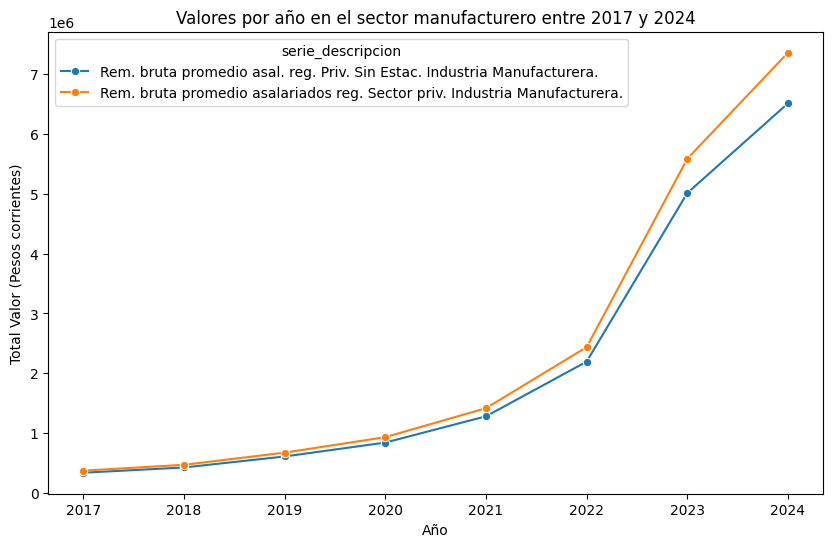

In [ ]:
valoresPorAño = (
    df[(df['dataset_fuente'] == "Ministerio de Capital Humano") &
       (df['serie_unidades'] == "Pesos corrientes") &
       (df['Year'] >= 2017) &
       (df['Year'] <= 2024) &
       (df['serie_titulo'].str.contains("manufactureras", case=False))]
    .groupby(['Year', 'serie_descripcion', 'serie_unidades'])
    .agg({'valor': 'sum'})
    .rename(columns={'valor': 'Total Valor'})
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=valoresPorAño, x='Year', y='Total Valor', hue='serie_descripcion', marker='o')
plt.title('Valores por año en el sector manufacturero entre 2017 y 2024')
plt.xlabel('Año')
plt.ylabel('Total Valor (Pesos corrientes)')
plt.show()

**Conclusión**

El impacto de la pandemia en Argentina se reflejó en una caída abrupta del empleo en sectores clave, seguida de una recuperación desigual. Mientras que sectores como manufacturaexperimentaron crecimiento, otros como el comercio tardaron más en recuperarse.

Este análisis permite comprender cómo se ha reconfigurado el mercado laboral en Argentina y proporciona información valiosa para la toma de decisiones en políticas públicas y estrategias empresariales.

